In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [7]:
# Size of example in bytes
size_per_example = 28 * 28 + 1

N_RAM = np.arange(100, 1400, 100)
N_EEPROM = np.arange(100, 1400, 100)

# Size of RAM and EEPROM buffers in MegaBytes
RAM_buffer_size = N_RAM * size_per_example / (1024 * 1024)
EEPROM_buffer_size = N_EEPROM * size_per_example / (1024 * 1024)

total_number_of_examples =  N_RAM[:, np.newaxis] + N_EEPROM

# distance matrix size in MegaBytes (assume 2 bytes per distance value)
# Distance matrix is symmetric so divide by 2 (only half of it needs to be stored)
dist_matrix_size = 2 * total_number_of_examples * (total_number_of_examples + 1) / (1024 * 1024 * 2)

Text(0.5, 1.0, 'Distance matrix size (MB)')

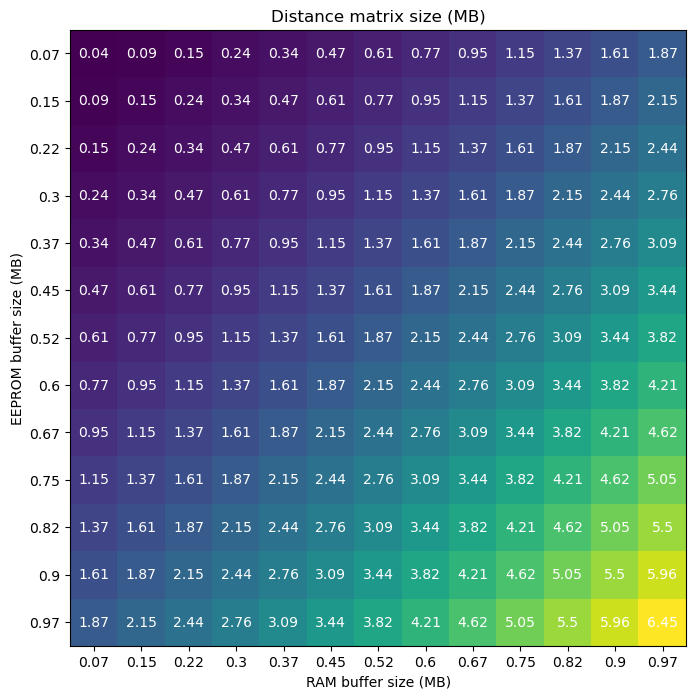

In [8]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.imshow(dist_matrix_size)

ax.set_xticks(np.arange(len(RAM_buffer_size)), labels=np.round(RAM_buffer_size, 2))
ax.set_yticks(np.arange(len(EEPROM_buffer_size)), labels=np.round(EEPROM_buffer_size, 2))
ax.set_xlabel('RAM buffer size (MB)')
ax.set_ylabel('EEPROM buffer size (MB)')

# Loop over data dimensions and create text annotations.
for i in range(len(RAM_buffer_size)):
    for j in range(len(EEPROM_buffer_size)):
        text = ax.text(j, i, round(dist_matrix_size[i, j], 2),
                       ha="center", va="center", color="w")
        
ax.set_title('Distance matrix size (MB)')

Text(0.5, 0, 'Distance matrix size (MB)')

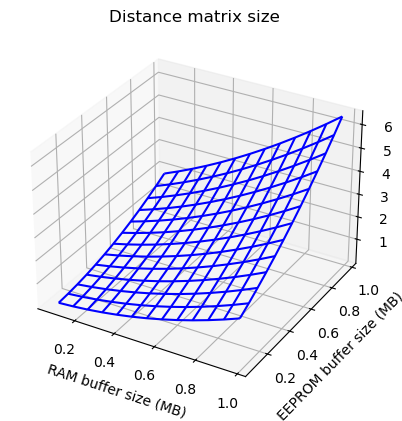

In [25]:
X, Y = np.meshgrid(RAM_buffer_size, EEPROM_buffer_size)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, dist_matrix_size.T, color ='blue')
ax.set_title('Distance matrix size');
ax.set_xlabel('RAM buffer size (MB)')
ax.set_ylabel('EEPROM buffer size (MB)')
ax.set_zlabel('Distance matrix size (MB)')